<a href="https://colab.research.google.com/github/jazminfuentesb/RAG_Limpieza_Proyecto_SE42_BEDU/blob/main/RAG_Limpieza_Proyecto_SE42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RAG Limpieza

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Limpieza, organización y estandarización de los **datos**

In [3]:
#Importación de librerias
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import json

In [45]:
#Creamos una variable para cargar la ruta y la concatenamos con el nombre del archivo para abrirlo
dataset = "/content/drive/MyDrive/BEDU/Proyecto_Equipo42/"
file_data  = open(dataset + 'csvjson.json', 'r')

#Agregamos una sentencia de excepción para evitar errores
try:
  # Cargamos el archivo, para su principal lectura y procesamiento de datos.
  result_data = json.load(file_data)
  print(type(result_data))
except Exception as e:
  print("Algo ocurrio con la lectura del archivo verifica la ruta")
  print(f'Error: {e}')
else:
  print("Lectura correcta")

<class 'list'>
Lectura correcta


In [46]:
#Convertimos el archivo json a un DataFrame y visualizamos los primeros registros
df = pd.DataFrame(result_data)
df.head()

,Calendar Address,Event Title,Event Description,Event Start,Event End,Calculated Duration,Visibility,Date Created,Last Updated,MyStatus,Created By,All Day Event,Recurring Event,Event End__1
0,raglimpieza@gmail.com,Apodaca,,7:45:00 a.m.,8:15:00 a.m.,.50,DEFAULT,9/17/2022,9/17/2022,OWNER,raglimpieza@gmail.com,FALSE,FALSE,26/9/2022
1,raglimpieza@gmail.com,Susana Martinez,Matrimonial,9:00:00 a.m.,10:00:00 a.m.,1,DEFAULT,9/17/2022,9/25/2022,OWNER,raglimpieza@gmail.com,FALSE,FALSE,26/9/2022
2,raglimpieza@gmail.com,Perla Armendáriz,Sala 322 $750\nTeflon $700\n2 tapetes PL\nTras...,10:30:00 a.m.,12:45:00 p.m.,2.25,DEFAULT,9/22/2022,9/25/2022,OWNER,raglimpieza@gmail.com,FALSE,FALSE,26/9/2022
3,raglimpieza@gmail.com,Ciro Leal,Sillas,2:00:00 p.m.,3:00:00 p.m.,1,DEFAULT,9/23/2022,9/25/2022,OWNER,raglimpieza@gmail.com,FALSE,FALSE,26/9/2022
4,raglimpieza@gmail.com,Pago a Jessy $358,Limpiaalfombras karcher,1:00:00 a.m.,1:45:00 a.m.,.75,DEFAULT,11/28/2021,11/28/2021,OWNER,raglimpieza@gmail.com,FALSE,TRUE,27/9/2022


In [47]:
#Generamos un nuevo dataFrame para manipularlo y no sobre escribir el original
df_limpio=df.drop(columns=["MyStatus","Calendar Address", "Visibility", "Date Created", "Last Updated","Created By","All Day Event", "Recurring Event"])
df_limpio

,Event Title,Event Description,Event Start,Event End,Calculated Duration,Event End__1
0,Apodaca,,7:45:00 a.m.,8:15:00 a.m.,.50,26/9/2022
1,Susana Martinez,Matrimonial,9:00:00 a.m.,10:00:00 a.m.,1,26/9/2022
2,Perla Armendáriz,Sala 322 $750\nTeflon $700\n2 tapetes PL\nTras...,10:30:00 a.m.,12:45:00 p.m.,2.25,26/9/2022
3,Ciro Leal,Sillas,2:00:00 p.m.,3:00:00 p.m.,1,26/9/2022
4,Pago a Jessy $358,Limpiaalfombras karcher,1:00:00 a.m.,1:45:00 a.m.,.75,27/9/2022
...,...,...,...,...,...,...
1243,Mara Aguirre,,4:00:00 p.m.,4:45:00 p.m.,.75,29/12/2021
1244,Juan Fabela,Sala 4p fijo c traslado $450,9:00:00 a.m.,11:00:00 a.m.,2,30/12/2021
1245,Solicito Jess,,11:00:00 a.m.,11:45:00 a.m.,.75,30/12/2021
1246,Mara Aguirre,,12:30:00 p.m.,1:15:00 p.m.,.75,30/12/2021


In [48]:
#Buscamos NaNs presentes en el DataFrame
df_limpio.isna().sum()

,0
Event Title,0
Event Description,0
Event Start,0
Event End,0
Calculated Duration,0
Event End__1,0


In [49]:
#Generamos un diccionario y renombramos las columnas
column_names = {
    'Event Title' : 'nombre_cliente',
    'Event Description' : 'descripcion_servicio',
    'Event Start' : 'hora_inicio',
    'Event End' : 'hora_fin',
    'Calculated Duration' : 'duracion_servicio',
    'Event End__1' : 'fecha_servicio'
}
df_limpio = df_limpio.rename(columns=column_names)
df_limpio.head()

,nombre_cliente,descripcion_servicio,hora_inicio,hora_fin,duracion_servicio,fecha_servicio
0,Apodaca,,7:45:00 a.m.,8:15:00 a.m.,.50,26/9/2022
1,Susana Martinez,Matrimonial,9:00:00 a.m.,10:00:00 a.m.,1,26/9/2022
2,Perla Armendáriz,Sala 322 $750\nTeflon $700\n2 tapetes PL\nTras...,10:30:00 a.m.,12:45:00 p.m.,2.25,26/9/2022
3,Ciro Leal,Sillas,2:00:00 p.m.,3:00:00 p.m.,1,26/9/2022
4,Pago a Jessy $358,Limpiaalfombras karcher,1:00:00 a.m.,1:45:00 a.m.,.75,27/9/2022


In [50]:
#Verificamos que las columnas tengan el tipo de dato correcto
df_limpio.dtypes

,0
nombre_cliente,object
descripcion_servicio,object
hora_inicio,object
hora_fin,object
duracion_servicio,object
fecha_servicio,object


In [51]:
#Buscamos registros vacios en la columna 'descripcion_servicio'
df_limpio.loc[df_limpio['descripcion_servicio']==""]

,nombre_cliente,descripcion_servicio,hora_inicio,hora_fin,duracion_servicio,fecha_servicio
0,Apodaca,,7:45:00 a.m.,8:15:00 a.m.,.50,26/9/2022
5,Poniente,,6:00:00 a.m.,6:45:00 a.m.,.75,27/9/2022
10,Cumbres,,5:00:00 a.m.,5:45:00 a.m.,.75,28/9/2022
12,Melissa Ibarra,,12:00:00 p.m.,1:30:00 p.m.,1.5,28/9/2022
16,Saltillo,,5:00:00 a.m.,5:45:00 a.m.,.75,29/9/2022
...,...,...,...,...,...,...
1237,Samantha Garcia,,12:00:00 p.m.,12:45:00 p.m.,.75,28/12/2021
1238,Antonio Gza,,12:30:00 p.m.,2:00:00 p.m.,1.5,28/12/2021
1243,Mara Aguirre,,4:00:00 p.m.,4:45:00 p.m.,.75,29/12/2021
1245,Solicito Jess,,11:00:00 a.m.,11:45:00 a.m.,.75,30/12/2021


In [52]:
#Sustituimos los registros vacios de la columna 'descripcion_servicio' por el string 'Sin comentarios'
df_limpio.loc[df_limpio['descripcion_servicio'] == "", 'descripcion_servicio'] = "Sin comentarios"
df_limpio.sample()

,nombre_cliente,descripcion_servicio,hora_inicio,hora_fin,duracion_servicio,fecha_servicio
605,Piñata Aimee,Sin comentarios,4:30:00 p.m.,7:00:00 p.m.,2.5,13/2/2023


In [53]:
#Corregimos el tipo de dato de fecha de servicio con formato '%d/%m/%Y'
df_limpio['fecha_servicio'] = pd.to_datetime(df_limpio['fecha_servicio'], format='%d/%m/%Y')

print(df_limpio.dtypes)

nombre_cliente                  object
descripcion_servicio            object
hora_inicio                     object
hora_fin                        object
duracion_servicio               object
fecha_servicio          datetime64[ns]
dtype: object


In [54]:
#Corregimos el formato de la hora de fin para poder convertir la columna a formato date, sustituimos a.m. y p.m. por AM y PM
df_limpio['hora_fin'] = df_limpio['hora_fin'].str.replace('a\.m\.', 'AM', regex=True)
df_limpio['hora_fin'] = df_limpio['hora_fin'].str.replace('p\.m\.', 'PM', regex=True)


df_limpio. head()

,nombre_cliente,descripcion_servicio,hora_inicio,hora_fin,duracion_servicio,fecha_servicio
0,Apodaca,Sin comentarios,7:45:00 a.m.,8:15:00 AM,.50,2022-09-26
1,Susana Martinez,Matrimonial,9:00:00 a.m.,10:00:00 AM,1,2022-09-26
2,Perla Armendáriz,Sala 322 $750\nTeflon $700\n2 tapetes PL\nTras...,10:30:00 a.m.,12:45:00 PM,2.25,2022-09-26
3,Ciro Leal,Sillas,2:00:00 p.m.,3:00:00 PM,1,2022-09-26
4,Pago a Jessy $358,Limpiaalfombras karcher,1:00:00 a.m.,1:45:00 AM,.75,2022-09-27


In [55]:
#Corregimos el formato de la hora de inicio para poder convertir la columna a formato date, sustituimos a.m. y p.m. por AM y PM
df_limpio['hora_inicio'] = df_limpio['hora_inicio'].str.replace('a\.m\.', 'AM', regex=True)
df_limpio['hora_inicio'] = df_limpio['hora_inicio'].str.replace('p\.m\.', 'PM', regex=True)


df_limpio.head()

,nombre_cliente,descripcion_servicio,hora_inicio,hora_fin,duracion_servicio,fecha_servicio
0,Apodaca,Sin comentarios,7:45:00 AM,8:15:00 AM,.50,2022-09-26
1,Susana Martinez,Matrimonial,9:00:00 AM,10:00:00 AM,1,2022-09-26
2,Perla Armendáriz,Sala 322 $750\nTeflon $700\n2 tapetes PL\nTras...,10:30:00 AM,12:45:00 PM,2.25,2022-09-26
3,Ciro Leal,Sillas,2:00:00 PM,3:00:00 PM,1,2022-09-26
4,Pago a Jessy $358,Limpiaalfombras karcher,1:00:00 AM,1:45:00 AM,.75,2022-09-27


In [56]:
#Cambiamos el formato de la columna fecha de inicio
df_limpio['hora_inicio'] = pd.to_datetime(df_limpio['hora_inicio'], format='%I:%M:%S %p')
df_limpio['hora_fin'] = pd.to_datetime(df_limpio['hora_fin'], format='%I:%M:%S %p')

print(df_limpio.dtypes)
#Para conservar el dtype datatime en hora de inicio es necesario sustituír la supuesta fecha por 2222-2-2 en todos los registros sin embargo si se quisiera quitar
#sería dejarlo como object solo extrayendo la fecha, esperamos indicación de que es mejor en este caso.


nombre_cliente                  object
descripcion_servicio            object
hora_inicio             datetime64[ns]
hora_fin                datetime64[ns]
duracion_servicio               object
fecha_servicio          datetime64[ns]
dtype: object


In [57]:
#Alconvertir a formato datetime pandas asigna una fecha a las columnas
df_limpio.head()

,nombre_cliente,descripcion_servicio,hora_inicio,hora_fin,duracion_servicio,fecha_servicio
0,Apodaca,Sin comentarios,1900-01-01 07:45:00,1900-01-01 08:15:00,.50,2022-09-26
1,Susana Martinez,Matrimonial,1900-01-01 09:00:00,1900-01-01 10:00:00,1,2022-09-26
2,Perla Armendáriz,Sala 322 $750\nTeflon $700\n2 tapetes PL\nTras...,1900-01-01 10:30:00,1900-01-01 12:45:00,2.25,2022-09-26
3,Ciro Leal,Sillas,1900-01-01 14:00:00,1900-01-01 15:00:00,1,2022-09-26
4,Pago a Jessy $358,Limpiaalfombras karcher,1900-01-01 01:00:00,1900-01-01 01:45:00,.75,2022-09-27


In [58]:
#para extraer s[olo la hora usamos dt.time

# Extraer solo las horas, minutos y segundos
df_limpio['inicio'] = df_limpio['hora_inicio'].dt.time

# Mostrar el DataFrame con la nueva columna
print(df_limpio[['hora_inicio', 'inicio']])

             hora_inicio    inicio
0    1900-01-01 07:45:00  07:45:00
1    1900-01-01 09:00:00  09:00:00
2    1900-01-01 10:30:00  10:30:00
3    1900-01-01 14:00:00  14:00:00
4    1900-01-01 01:00:00  01:00:00
...                  ...       ...
1243 1900-01-01 16:00:00  16:00:00
1244 1900-01-01 09:00:00  09:00:00
1245 1900-01-01 11:00:00  11:00:00
1246 1900-01-01 12:30:00  12:30:00
1247 1900-01-01 13:30:00  13:30:00

[1248 rows x 2 columns]


In [59]:
# Extraer solo las horas, minutos y segundos
df_limpio['fin'] = df_limpio['hora_fin'].dt.time

# Mostrar el DataFrame con la nueva columna
print(df_limpio[['hora_fin', 'fin']])

                hora_fin       fin
0    1900-01-01 08:15:00  08:15:00
1    1900-01-01 10:00:00  10:00:00
2    1900-01-01 12:45:00  12:45:00
3    1900-01-01 15:00:00  15:00:00
4    1900-01-01 01:45:00  01:45:00
...                  ...       ...
1243 1900-01-01 16:45:00  16:45:00
1244 1900-01-01 11:00:00  11:00:00
1245 1900-01-01 11:45:00  11:45:00
1246 1900-01-01 13:15:00  13:15:00
1247 1900-01-01 15:00:00  15:00:00

[1248 rows x 2 columns]


In [60]:
#Creamos dos columnas que contienen solo las horas de inicio y final del servicio
df_limpio.head()

,nombre_cliente,descripcion_servicio,hora_inicio,hora_fin,duracion_servicio,fecha_servicio,inicio,fin
0,Apodaca,Sin comentarios,1900-01-01 07:45:00,1900-01-01 08:15:00,.50,2022-09-26,07:45:00,08:15:00
1,Susana Martinez,Matrimonial,1900-01-01 09:00:00,1900-01-01 10:00:00,1,2022-09-26,09:00:00,10:00:00
2,Perla Armendáriz,Sala 322 $750\nTeflon $700\n2 tapetes PL\nTras...,1900-01-01 10:30:00,1900-01-01 12:45:00,2.25,2022-09-26,10:30:00,12:45:00
3,Ciro Leal,Sillas,1900-01-01 14:00:00,1900-01-01 15:00:00,1,2022-09-26,14:00:00,15:00:00
4,Pago a Jessy $358,Limpiaalfombras karcher,1900-01-01 01:00:00,1900-01-01 01:45:00,.75,2022-09-27,01:00:00,01:45:00


In [61]:
#Removemos las columnas 'hora_inicio' y 'hora_fin' pues ya no son necesarias porque contienen datos con ruido
df_limpio = df_limpio.drop(columns=['hora_inicio'])
df_limpio = df_limpio.drop(columns=['hora_fin'])
df_limpio.head()


,nombre_cliente,descripcion_servicio,duracion_servicio,fecha_servicio,inicio,fin
0,Apodaca,Sin comentarios,.50,2022-09-26,07:45:00,08:15:00
1,Susana Martinez,Matrimonial,1,2022-09-26,09:00:00,10:00:00
2,Perla Armendáriz,Sala 322 $750\nTeflon $700\n2 tapetes PL\nTras...,2.25,2022-09-26,10:30:00,12:45:00
3,Ciro Leal,Sillas,1,2022-09-26,14:00:00,15:00:00
4,Pago a Jessy $358,Limpiaalfombras karcher,.75,2022-09-27,01:00:00,01:45:00


In [62]:
#Continuando con el cambio de formato, cambiamos a tipo float la columna duracion de servicio
df_limpio['duracion_servicio'] = df_limpio['duracion_servicio'].astype(float)
print(df_limpio.dtypes)

nombre_cliente                  object
descripcion_servicio            object
duracion_servicio              float64
fecha_servicio          datetime64[ns]
inicio                          object
fin                             object
dtype: object


##Calcular metricas y rangos de datos

In [63]:
#El primer paso es calcular el tiempo min y maximo de los servicios, sin embargo nos encontramos que habia un error en los valores pues al calcular el valor minimo nos daba un valor negativo. Por lo tanto procedimos a corregir esos datos
duracion_min = df_limpio['duracion_servicio'].min()
print("La duración mínima del servicio fue de", duracion_min)

La duración mínima del servicio fue de -20.0


In [64]:
#Sabiamos que habia valores negativos por lo que usamos una sentencia if para notificar al usuario
if (df_limpio['duracion_servicio'] < 0).any():
    print("Error en la duracion del servicio, existe un valor negativo en la columna.")
else:
    print("Valores correctos.")

Error en la duracion del servicio, existe un valor negativo en la columna.


In [65]:
#contamos la cantidad de elementos negativos
cantidad_menos_0 = (df_limpio['duracion_servicio'] < 0).sum()
print(cantidad_menos_0)

2


In [66]:
#Remplazamos los valores negativos por ceros
df_limpio['duracion_servicio'] = df_limpio['duracion_servicio'].replace(-20, 0)

In [67]:
#Recalculamos el tiempo minimo por servicio
duracion_min = df_limpio['duracion_servicio'].min()
print("La duración mínima del servicio fue de", duracion_min)

La duración mínima del servicio fue de 0.0


In [68]:
#Calculamos el valor maximo y el tiempo promedio
duracion_max = df_limpio['duracion_servicio'].max()
print("La duración máxima del servicio fue de", duracion_max)
duracion_media = df_limpio['duracion_servicio'].mean()
print("La duración media del servicio fue de", duracion_media)

La duración máxima del servicio fue de 9.75
La duración media del servicio fue de 1.5265544871794872


In [69]:
df_limpio.head()

,nombre_cliente,descripcion_servicio,duracion_servicio,fecha_servicio,inicio,fin
0,Apodaca,Sin comentarios,0.50,2022-09-26,07:45:00,08:15:00
1,Susana Martinez,Matrimonial,1.00,2022-09-26,09:00:00,10:00:00
2,Perla Armendáriz,Sala 322 $750\nTeflon $700\n2 tapetes PL\nTras...,2.25,2022-09-26,10:30:00,12:45:00
3,Ciro Leal,Sillas,1.00,2022-09-26,14:00:00,15:00:00
4,Pago a Jessy $358,Limpiaalfombras karcher,0.75,2022-09-27,01:00:00,01:45:00


Text(0.5, 1.0, 'Gráfica de barras de duración del servicio')

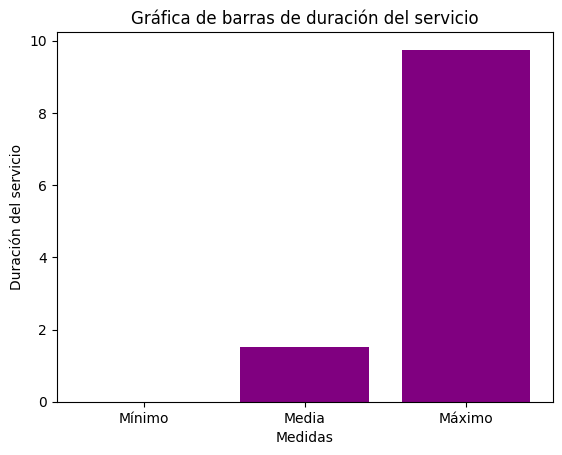

In [70]:
# Datos para la gráfica
valores = [duracion_min, duracion_media, duracion_max]
etiquetas = ['Mínimo', 'Media', 'Máximo']

# Crear la gráfica de barras
plt.bar(etiquetas, valores, color='purple')

# Agregar etiquetas y título
plt.xlabel('Medidas')
plt.ylabel('Duración del servicio')
plt.title('Gráfica de barras de duración del servicio')


In [71]:
moda_inicio = df_limpio['inicio'].mode()[0]
print(f"La hora de inicio que más se repite es: {moda_inicio}")

La hora de inicio que más se repite es: 09:00:00


In [72]:
frecuencia_inicio = df_limpio['inicio'].value_counts()
print(frecuencia_inicio)

inicio
09:00:00    159
10:00:00     91
11:00:00     78
15:00:00     71
14:00:00     70
           ... 
22:00:00      1
08:45:00      1
15:46:00      1
02:30:00      1
07:45:00      1
Name: count, Length: 65, dtype: int64


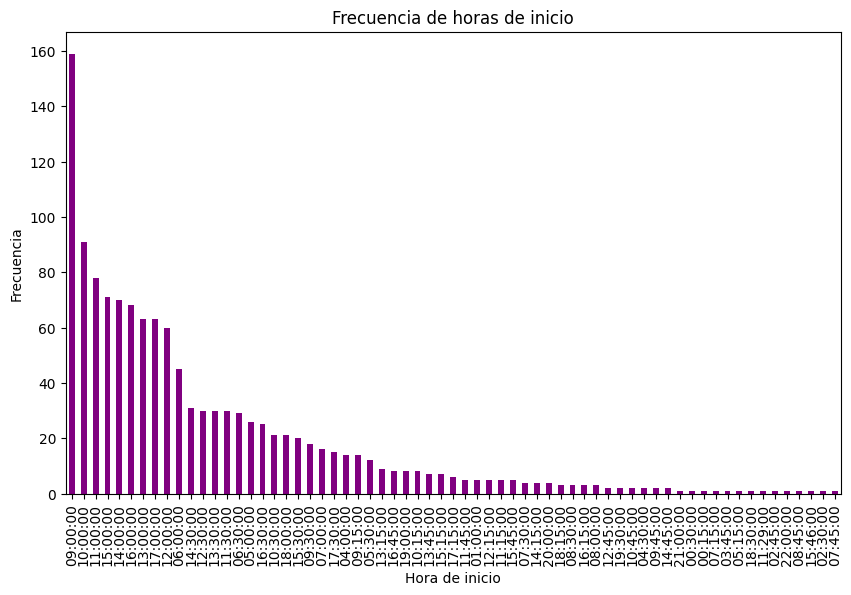

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura (ancho, alto)
frecuencia_inicio.plot(kind='bar', color='purple')
plt.xlabel('Hora de inicio')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de horas de inicio')
plt.show()

In [74]:
# aplicamos la funcion de map, para generar un rango que nos permita etiquetar si los servicios fueron cortos o largos
def servicio_range(servicio):
    if 0.0 <= servicio < 1.5:
        return 'Servicio Corto'
    elif 1.5 <= servicio < 3.0:
        return 'Servicio Medio'
    else:
        return 'Servicio Largo'

df_limpio['servicio_range'] = df_limpio['duracion_servicio'].map(servicio_range)
df_limpio.head()

,nombre_cliente,descripcion_servicio,duracion_servicio,fecha_servicio,inicio,fin,servicio_range
0,Apodaca,Sin comentarios,0.50,2022-09-26,07:45:00,08:15:00,Servicio Corto
1,Susana Martinez,Matrimonial,1.00,2022-09-26,09:00:00,10:00:00,Servicio Corto
2,Perla Armendáriz,Sala 322 $750\nTeflon $700\n2 tapetes PL\nTras...,2.25,2022-09-26,10:30:00,12:45:00,Servicio Medio
3,Ciro Leal,Sillas,1.00,2022-09-26,14:00:00,15:00:00,Servicio Corto
4,Pago a Jessy $358,Limpiaalfombras karcher,0.75,2022-09-27,01:00:00,01:45:00,Servicio Corto


In [75]:
#agrupamos por rango de servicio
df_limpio.groupby('servicio_range').agg({'duracion_servicio': ['min', 'mean', 'max']})


duracion_servicio                
                             min      mean   max
servicio_range                                  
Servicio Corto               0.0  0.850031  1.48
Servicio Largo               3.0  3.950472  9.75
Servicio Medio               1.5  1.883407  2.75

In [76]:
#Agrupamos los servicios por fecha de servicio para visualizar las temporadas altas
servicios_por_mes = df_limpio.groupby(df_limpio['fecha_servicio'].dt.to_period('M')).size()
print(servicios_por_mes)

fecha_servicio
2021-06     77
2021-07     79
2021-08    117
2021-09     87
2021-10     85
2021-11     87
2021-12     87
2022-09     21
2022-10    110
2022-11    145
2022-12    139
2023-01    140
2023-02     74
Freq: M, dtype: int64


In [77]:
# #Localizamos clientes repetidos
# df_limpio['nombre_cliente'].duplicated.sum()

#Creamos una función para clasificar a los clientes nuevos y los recurrentes
def clasificar_cliente(nombre):
    if df_limpio['nombre_cliente'].value_counts()[nombre] > 1:
        return 'Cliente recurrente'
    else:
        return 'Cliente nuevo'

df_limpio['tipo_cliente'] = df_limpio['nombre_cliente'].apply(clasificar_cliente)
df_limpio.head()


,nombre_cliente,descripcion_servicio,duracion_servicio,fecha_servicio,inicio,fin,servicio_range,tipo_cliente
0,Apodaca,Sin comentarios,0.50,2022-09-26,07:45:00,08:15:00,Servicio Corto,Cliente recurrente
1,Susana Martinez,Matrimonial,1.00,2022-09-26,09:00:00,10:00:00,Servicio Corto,Cliente nuevo
2,Perla Armendáriz,Sala 322 $750\nTeflon $700\n2 tapetes PL\nTras...,2.25,2022-09-26,10:30:00,12:45:00,Servicio Medio,Cliente recurrente
3,Ciro Leal,Sillas,1.00,2022-09-26,14:00:00,15:00:00,Servicio Corto,Cliente nuevo
4,Pago a Jessy $358,Limpiaalfombras karcher,0.75,2022-09-27,01:00:00,01:45:00,Servicio Corto,Cliente recurrente


In [78]:
df_limpio.groupby('tipo_cliente')['servicio_range'].value_counts()

tipo_cliente        servicio_range
Cliente nuevo       Servicio Medio    337
                    Servicio Corto    322
                    Servicio Largo     62
Cliente recurrente  Servicio Corto    321
                    Servicio Medio    162
                    Servicio Largo     44
Name: count, dtype: int64

In [79]:
df_limpio.to_csv(dataset + 'RAG_Limpieza_New_DB.csv')